In [28]:
#Setting up for confusion matrix print-outs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix,class_names,figsize=(5,3),fontsize=10):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return fig

In [29]:
#Loading the dataset
from __future__ import print_function
import os
import pandas as pd

#Training data
dataPath = ['/home/ashmin/Desktop/MachineLearning/Data']
filePath = os.sep.join(dataPath + ['poker-hand-training-true.csv'])
df = pd.read_csv(filePath, header = 0)

#Testing data 
filePath = os.sep.join(dataPath + ['poker-hand-testing.csv'])
df1 = pd.read_csv(filePath, header = 0)

#Defining the dataframe columns
df.columns = ['S1', 'C1', 'S2', 'C2', 'S3','C3','S4','C4','S5','C5','CLASS']
df1.columns = ['S1', 'C1', 'S2', 'C2', 'S3','C3','S4','C4','S5','C5','CLASS']

In [30]:
df.head(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [31]:
df1.head(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [32]:
#As the testing data provided by UCI has more instances(100,000), we use that for training instead
#Setting the train and test data
X_train = df1.drop(['CLASS'], axis = 1)
y_train = df1.CLASS

X_test = df.drop(['CLASS'], axis = 1)
y_test = df.CLASS

print("Training dataset shape: ", X_train.shape, "\nTesting dataset shape: ", X_test.shape)

Training dataset shape:  (999999, 10) 
Testing dataset shape:  (25009, 10)


In [33]:
#Fitting the random forest classifier without any preprocessing
from sklearn.ensemble import RandomForestClassifier
from time import time

randomForest = RandomForestClassifier(n_estimators=10,random_state=0)

#Calculating the predicition time 
startTime = time()
randomForest.fit(X_train, y_train)
print("Fitting time for Random Forest (no preprocessing): ", round(time()-startTime, 3), "seconds")

Fitting time for Random Forest (no preprocessing):  47.79 seconds


In [34]:
#Making predictions with the model and calculating the accuracy score
from sklearn.metrics import accuracy_score

#Calculating the prediction time 
startTime = time()
predictions = randomForest.predict(X_test)
print("Prediction time for Random Forest (no preproccessing): ", round(time()-startTime, 3), " seconds")

Prediction time for Random Forest (no preproccessing):  0.251  seconds


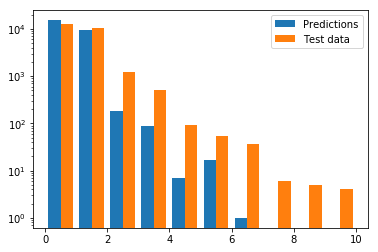

In [35]:
#Check what classes the model is predicting 
import matplotlib.pyplot as plt
import numpy as np
plt.hist((np.reshape(predictions,(y_test.shape[0],)),y_test),bins=[0,1,2,3,4,5,6,7,8,9,10],log=True)
plt.legend(labels=('Predictions','Test data'))
plt.show() 



Cross-validation score: 


/home/ashmin/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.68617251 0.67513268 0.6896259 ]
Confusion matrix: 
[[429314  71736    111     21     14     12      0      0      0      0]
 [170509 248571   2928    375    109      2      4      0      0      0]
 [  6261  37919   3225    194     12      0     10      1      0      0]
 [  2221  16117    539   2218      8      0     17      1      0      0]
 [   845   2919     34      3     84      0      0      0      0      0]
 [  1627    160      0      0      0    209      0      0      0      0]
 [    38    972    259    134      0      0     21      0      0      0]
 [     7    106     36     78      0      0      2      1      0      0]
 [     4      8      0      0      0      0      0      0      0      0]
 [     1      2      0      0      0      0      0      0      0      0]]


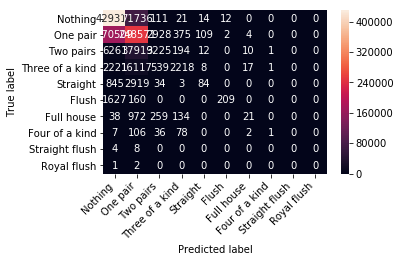

Precision score: 
0.6836436836436837
Recall score: 
0.6836436836436837
F1 score: 
0.6836436836436837


In [36]:
#Evaluation metrics for Random Forest (no preprocessing)
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#Names of the classes
classNames = ["Nothing", "One pair", "Two pairs", "Three of a kind", "Straight", "Flush", "Full house", "Four of a kind", "Straight flush", "Royal flush"] 

#Cross-validation score
print("Cross-validation score: ")
print(cross_val_score(randomForest, X_train, y_train, scoring="accuracy"))

#Cross_validation predictions
predictions = cross_val_predict(randomForest, X_train, y_train, cv=3)

#Confusion matrix
print("Confusion matrix: ")
print(confusion_matrix(y_train, predictions))

#A better figure representation of the confusion matrix
print_confusion_matrix(confusion_matrix(y_train, predictions), classNames)

#Precision
print("Precision score: ")
print(precision_score(y_train, predictions, average='micro'))

#Recall score
print("Recall score: ")
print(recall_score(y_train, predictions, average='micro')) 

#F1 score
print("F1 score: ")
print(f1_score(y_train, predictions, average='micro'))

In [37]:
#Calculate the log loss
from sklearn.metrics import log_loss
logLoss = log_loss(y_test, randomForest.predict_proba(X_test))
print("The log loss: ", logLoss)

#HUGE LOGLOSS
#Inference: The model slowly stops predicting; lack of training instances may be a problem

The log loss:  1.2519889782979603


In [41]:
#Concatenate the two datasets
concatDF = pd.concat([df, df1])
concatDF.shape

#Defining the dataframe columns
concatDF.columns = ['S1', 'C1', 'S2', 'C2', 'S3','C3','S4','C4','S5','C5','CLASS']

In [42]:
#Try train_test_split
from sklearn.model_selection import train_test_split
y = concatDF.CLASS
X_train, X_test, y_train, y_test = train_test_split(concatDF, y, test_size = 0.1)

In [43]:
#Fit the model again, make predictions, calculate accuracy

#Calculate training time 
startTime = time()
randomForest.fit(X_train, y_train)
print("Training time for Random Forest: ", round(time()-startTime, 3), " seconds")

#Calculate prediction time 
startTime = time()
predictions = randomForest.predict(X_test)
print("Prediction time for Random Forest: ", round(time()-startTime, 3), " seconds")

#Accuracy score
accuracyScore = accuracy_score(y_test, predictions)
print("Accuracy score after train test split (Random Forest): ", accuracyScore)

Training time for Random Forest:  18.9  seconds
Prediction time for Random Forest:  0.155  seconds
Accuracy score after train test split (Random Forest):  0.9996487839143032


Cross-validation score: 


/home/ashmin/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.99939188 0.99953496 0.99948943]
Confusion matrix: 
[[462345      0      0      0      0      0      0      0      0      0]
 [     0 389776      0      0      0      0      0      0      0      0]
 [     0      0  43914      0      0      0      0      0      0      0]
 [     0      0      5  19501      0      0      0      0      0      0]
 [     0      1      6     39   3523      0      1      0      0      0]
 [     0      0      0      1      2   1843      0      0      0      0]
 [     0      1     19    181     55      4   1047      4      0      0]
 [     0      0      1     56     16      1     72     69      0      0]
 [     0      0      0      0      4      8      3      0      2      0]
 [     0      0      0      0      3      3      0      0      1      0]]


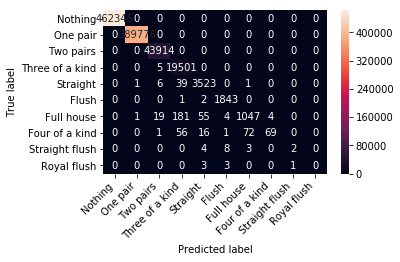

Precision score: 
0.9994720907266829
Recall score: 
0.9994720907266829
F1 score: 
0.9994720907266829


In [44]:
#Cross-validation score
print("Cross-validation score: ")
print(cross_val_score(randomForest, X_train, y_train, scoring="accuracy"))

#Cross_validation predictions
predictions = cross_val_predict(randomForest, X_train, y_train, cv=3)

#Confusion matrix
print("Confusion matrix: ")
print(confusion_matrix(y_train, predictions))

#A better figure representation of the confusion matrix
print_confusion_matrix(confusion_matrix(y_train, predictions), classNames)

#Precision
print("Precision score: ")
print(precision_score(y_train, predictions, average='micro'))

#Recall score
print("Recall score: ")
print(recall_score(y_train, predictions, average='micro')) 

#F1 score
print("F1 score: ")
print(f1_score(y_train, predictions, average='micro'))

In [45]:
#The best preprocessing steps for this dataset: concatenation of the two datasets and applying 90 to 10 split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#Fit and calculate the training time 
startTime=time() 
knn.fit(X_train, y_train)
print("Training time for KNN: ", round(time()-startTime, 3), " seconds")

#Predict and calculate the prediction time
startTime=time()
predictions = knn.predict(X_test)
print("Prediction time for KNN: ", round(time()-startTime, 3), " seconds")

Training time for KNN:  68.261  seconds
Prediction time for KNN:  166.691  seconds


Cross-validation score: 


/home/ashmin/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.85451944 0.85511964 0.85804553]
Confusion matrix: 
[[435737  26608      0      0      0      0      0      0      0      0]
 [ 64583 324603    590      0      0      0      0      0      0      0]
 [    18  30610  12974    312      0      0      0      0      0      0]
 [     0   3607   4307  11523     69      0      0      0      0      0]
 [     0      0    234    975   2360      1      0      0      0      0]
 [     0      1     56    197    102   1483      7      0      0      0]
 [     0      0      2    194    206     67    835      7      0      0]
 [     0      0      0     49      2      9    101     54      0      0]
 [     0      0      0      0      0      2     15      0      0      0]
 [     0      0      0      0      3      1      0      3      0      0]]


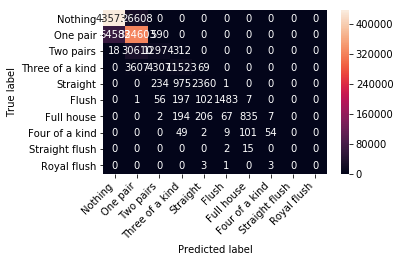

Precision score: 
0.8558948604184033
Recall score: 
0.8558948604184033
F1 score: 
0.8558948604184033


In [48]:
#Cross-validation score
print("Cross-validation score: ")
print(cross_val_score(knn, X_train, y_train, scoring="accuracy"))

#Cross_validation predictions
predictions = cross_val_predict(knn, X_train, y_train, cv=3)

#Confusion matrix
print("Confusion matrix: ")
print(confusion_matrix(y_train, predictions))

#A better figure representation of the confusion matrix
print_confusion_matrix(confusion_matrix(y_train, predictions), classNames)

#Precision
print("Precision score: ")
print(precision_score(y_train, predictions, average='micro'))

#Recall score
print("Recall score: ")
print(recall_score(y_train, predictions, average='micro')) 

#F1 score
print("F1 score: ")
print(f1_score(y_train, predictions, average='micro'))

In [49]:
#Trying out SGDClassifier
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()

#Calculating fitting time
startTime = time()
SGD.fit(X_train, y_train)
print("Training time for SGDClassifier: ", round(time()-startTime, 3), " seconds")

#Making predictions and calculating the prediction time 
startTime = time()
predictions = SGD.predict(X_test)
print("Prediction time for SGDClassifier: ", round(time()-startTime, 3), " seconds")

/home/ashmin/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Training time for SGDClassifier:  8.941  seconds
Prediction time for SGDClassifier:  0.05  seconds


Cross-validation score: 


/home/ashmin/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ashmin/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ashmin/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_

[0.92369555 0.92370131 0.92370732]


/home/ashmin/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ashmin/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ashmin/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they defau

Confusion matrix: 
[[462345      0      0      0      0      0      0      0      0      0]
 [     0 389776      0      0      0      0      0      0      0      0]
 [     0  43914      0      0      0      0      0      0      0      0]
 [     0  19506      0      0      0      0      0      0      0      0]
 [     0   3570      0      0      0      0      0      0      0      0]
 [     0   1846      0      0      0      0      0      0      0      0]
 [     0   1311      0      0      0      0      0      0      0      0]
 [     0    215      0      0      0      0      0      0      0      0]
 [     0     17      0      0      0      0      0      0      0      0]
 [     0      7      0      0      0      0      0      0      0      0]]


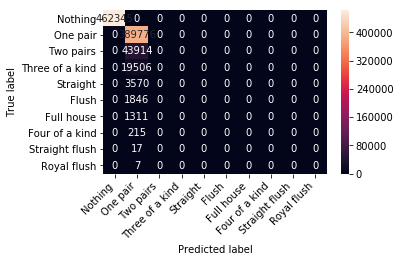

Precision score: 
0.9237013919677575
Recall score: 
0.9237013919677575
F1 score: 
0.9237013919677575


In [51]:
#Cross-validation score
print("Cross-validation score: ")
print(cross_val_score(SGD, X_train, y_train, scoring="accuracy"))

#Cross_validation predictions
predictions = cross_val_predict(SGD, X_train, y_train, cv=3)

#Confusion matrix
print("Confusion matrix: ")
print(confusion_matrix(y_train, predictions))

#A better figure representation of the confusion matrix
print_confusion_matrix(confusion_matrix(y_train, predictions), classNames)

#Precision
print("Precision score: ")
print(precision_score(y_train, predictions, average='micro'))

#Recall score
print("Recall score: ")
print(recall_score(y_train, predictions, average='micro')) 

#F1 score
print("F1 score: ")
print(f1_score(y_train, predictions, average='micro'))

In [106]:
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.models import Sequential

def createModel():
    model = Sequential()
    model.add(Dense(10, input_dim=11, kernel_initializer='normal', activation='relu'))
    print("The first layer.")
    
    #Hidden layer
    model.add(Dense(3, kernel_initializer='normal', activation='relu'))
    print("The hidden layer.")
    
    #Output layer
    model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
    print("The output layer.")
    
    # Compiling model
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
print("Starting the estimator... 9")

#Creation and fitting time measurement
startTime = time()
kerasModel = createModel()
history = kerasModel.fit(X_train, y_train, epochs=5, batch_size=50, verbose=1)
print("Time for creation and fitting: ", round(time() - startTime, 3), " seconds")

Starting the estimator... 9
The first layer.
The hidden layer.
The output layer.
Epoch 1/5
922507/922507 [==============================] - 33s 36us/step - loss: 0.0921 - acc: 0.9595
Epoch 2/5
922507/922507 [==============================] - 30s 32us/step - loss: 0.0113 - acc: 0.9958
Epoch 3/5
922507/922507 [==============================] - 29s 31us/step - loss: 0.0068 - acc: 0.9976
Epoch 4/5
922507/922507 [==============================] - 28s 31us/step - loss: 0.0051 - acc: 0.9982
Epoch 5/5
922507/922507 [==============================] - 28s 31us/step - loss: 0.0045 - acc: 0.9985
Time for creation and fitting:  148.989  seconds


In [107]:
predictions = kerasModel.predict(X_test)
